In [91]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Number of records
num_records = 1000

# Function to generate random dates between start and end date
def random_dates(start, end, n):
    start_u = start.value // 10**9
    end_u = end.value // 10**9
    return pd.to_datetime(np.random.randint(start_u, end_u, n), unit='s')

# Generate data
np.random.seed(5)
app_nums = np.random.randint(100000, 1000000, size=num_records).astype(int)
submit_dates = random_dates(pd.to_datetime('2019-01-01'), pd.to_datetime('2022-07-01'), num_records)
statuses = np.random.choice(['approved', 'declined', 'reviewing'], size=num_records)
terms = np.random.uniform(6, 30, size=num_records).astype(int)
industries = np.random.choice(['construction', 'transportation', 'medical', 'software'], size=num_records)
funded = np.where(statuses == 'approved', 1, 0)
funded_amts = np.random.uniform(1000, 500000, size=num_records)
downpayment_pct = np.random.uniform(0, 0.4, size=num_records)
downpayment_amts = funded_amts * downpayment_pct

# Create DataFrame
df = pd.DataFrame({
    'AppNum': app_nums,
    'SubmitDate': submit_dates,
    'Status': statuses,
    'Term': terms,
    'Industry': industries,
    'funded': funded,
    'FundedAmt': funded_amts,
    'DownPayment_pct': downpayment_pct,
    'DownPayment_amt': downpayment_amts
})
df['Status'].value_counts()


Status
approved     354
declined     330
reviewing    316
Name: count, dtype: int64

In [92]:
us_state_codes = [
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 
    'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 
    'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 
    'MD', 'MA', 'MI', 'MN', 'MS', 
    'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 
    'NM', 'NY', 'NC', 'ND', 'OH', 
    'OK', 'OR', 'PA', 'RI', 'SC', 
    'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 
    'WA', 'WV', 'WI', 'WY'
]

# Generate random states using their two-letter codes
df['State'] = np.random.choice(us_state_codes, size=num_records)


In [93]:
# Determine the indices for the most recent 50 applications
recent_50_indices = df['SubmitDate'].nlargest(50).index

# Assign 'reviewing' status to the most recent 50 applications
statuses = np.random.choice(['approved', 'declined'], size=num_records)  # Default for all
statuses[recent_50_indices] = 'reviewing'  # Set the most recent 50 to 'reviewing'

# Update the 'Status' column in the DataFrame
df['Status'] = statuses

In [94]:
df['Status'].value_counts()

Status
approved    502
declined    448
reviewin     50
Name: count, dtype: int64

In [95]:
# Initialize new columns with default values based on Status
months_in_business = np.where(df['Status'] == 'declined', 
                              np.random.randint(12, 61, size=num_records),
                              np.where(df['Status'] == 'approved', 
                                       np.random.randint(50, 121, size=num_records), 
                                       np.random.randint(12, 121, size=num_records)))

Avg_B09_ScoreValue = np.where(df['Status'] == 'declined', 
                              np.random.uniform(500, 701, size=num_records),
                              np.where(df['Status'] == 'approved', 
                                       np.random.uniform(680, 801, size=num_records), 
                                       np.random.uniform(500, 801, size=num_records)))

L_MSV2_rawscore = np.where(df['Status'] == 'declined', 
                           np.random.uniform(600, 661, size=num_records),
                           np.where(df['Status'] == 'approved', 
                                    np.random.uniform(650, 801, size=num_records), 
                                    np.random.uniform(600, 801, size=num_records)))

# Add the new columns to the DataFrame
df['months_in_business'] = months_in_business
df['Avg_B09_ScoreValue'] = Avg_B09_ScoreValue
df['L_MSV2_rawscore'] = L_MSV2_rawscore


In [96]:
df

,AppNum,SubmitDate,Status,Term,Industry,funded,FundedAmt,DownPayment_pct,DownPayment_amt,State,months_in_business,Avg_B09_ScoreValue,L_MSV2_rawscore
0,397827,2022-04-17 10:26:50,declined,19,medical,0,492841.736107,0.142397,70179.375410,HI,27,504.115884,653.400807
1,118638,2020-11-27 06:20:50,approved,9,medical,1,13572.229623,0.044169,599.469835,DE,101,739.882699,659.130336
2,644751,2019-01-02 18:39:24,approved,26,construction,1,171623.276798,0.155326,26657.523907,AK,71,750.892977,670.137720
3,224605,2022-02-11 14:45:09,approved,22,software,1,22671.604862,0.326985,7413.276549,IA,94,751.133321,698.490133
4,856710,2021-08-23 13:46:24,approved,24,medical,0,183731.486870,0.150059,27570.558159,MS,86,775.355395,774.872993
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,574494,2019-11-24 14:07:03,declined,28,medical,1,71840.203132,0.389570,27986.810425,AK,32,527.574479,625.542455
996,638298,2020-11-26 06:17:43,declined,25,transportation,0,296619.944060,0.136081,40364.442885,WV,21,637.550713,613.519043
997,722158,2019-05-23 03:57:29,approved,16,software,0,493055.326929,0.227682,112259.975239,KY,97,800.521208,774.454646
998,721605,2022-04-13 04:01:09,approved,7,software,1,396726.006600,0.027135,10765.001152,AZ,58,775.480221,711.764668


In [97]:
df = df.round({
    'AppNum': 2,
    'Term': 2,
    'FundedAmt': 2,
    'DownPayment_pct': 2,
    'DownPayment_amt': 2,
    'Avg_B09_ScoreValue': 2,
    'L_MSV2_rawscore': 2
})

# Format SubmitDate to keep only the date in YYYY-MM-DD format
df['SubmitDate'] = df['SubmitDate'].dt.strftime('%Y-%m-%d')


In [98]:
def assign_score(series):
    return pd.qcut(series, q=4, labels=[0, 111, 222, 333]).astype(int)

# Apply the function to the relevant columns
df['score_months_in_business'] = assign_score(df['months_in_business'])
df['score_Avg_B09_ScoreValue'] = assign_score(df['Avg_B09_ScoreValue'])
df['score_L_MSV2_rawscore'] = assign_score(df['L_MSV2_rawscore'])

# Calculate the total score
df['total_score'] = df['score_months_in_business'] + df['score_Avg_B09_ScoreValue'] + df['score_L_MSV2_rawscore']


In [99]:
df['total_score'].value_counts()

total_score
888    160
222    154
777    152
111    148
666    125
0       82
333     66
999     47
555     39
444     27
Name: count, dtype: int64

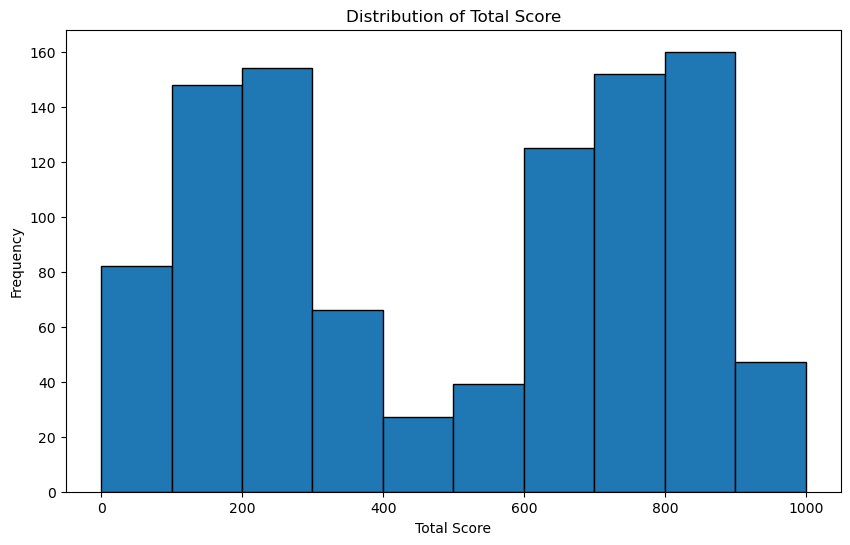

In [100]:
import matplotlib.pyplot as plt

# Plot the distribution of total_score
plt.figure(figsize=(10, 6))
df['total_score'].hist(bins=10, edgecolor='black')
plt.title('Distribution of Total Score')
plt.xlabel('Total Score')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

In [101]:
approved_lowest_scores = df[df['Status'] == 'approved'].sort_values(by='total_score').head(100)

# Display the result
approved_lowest_scores[['AppNum', 'SubmitDate', 'total_score']].reset_index(drop=True)

,AppNum,SubmitDate,total_score
0,296263,2021-05-19,444
1,353535,2021-01-06,444
2,495535,2021-08-10,444
3,352648,2020-04-14,444
4,757645,2020-11-12,444
...,...,...,...
95,637849,2019-02-15,666
96,707180,2020-10-17,666
97,910544,2020-11-09,666
98,750932,2022-02-09,666


In [102]:
def assign_risk_grade(score):
    if score <= 200:
        return 'E'
    elif score <= 400:
        return 'D'
    elif score <= 600:
        return 'C'
    elif score <= 800:
        return 'B'
    else:
        return 'A'

# Apply the function to create the risk_grade column
df['risk_grade'] = df['total_score'].apply(assign_risk_grade)


In [103]:
df['risk_grade']

0      E
1      B
2      B
3      A
4      A
      ..
995    E
996    E
997    A
998    B
999    B
Name: risk_grade, Length: 1000, dtype: object

In [104]:
#back office creation for approved deals

In [105]:
import pandas as pd
import numpy as np

# Get the list of application numbers with lowest scores
low_score_app_nums = approved_lowest_scores['AppNum'].tolist()
approved_df = df[df['Status'] == 'approved']

# Initialize an empty list to store the payment records
payment_records = []

# Function to get the end of the month date
def end_of_month(date):
    return (date.replace(day=1) + pd.DateOffset(months=1) - pd.DateOffset(days=1)).strftime('%d/%m/%Y')

# Generate payment records
for _, row in approved_df.iterrows():
    start_date = pd.to_datetime(row['SubmitDate'])
    term = int(np.ceil(row['Term']))  # Number of months for the term
    i_th_month = term // 2  # Calculate i-th month
    
    for month in range(term):
        payment_date = start_date + pd.DateOffset(months=month)
        
        if row['AppNum'] in low_score_app_nums and month >= i_th_month: #this makes sure it is only for the ones with the lowest scores amongst the approved ones. 
            # Assign a random delinquent value (0, 30, 45, 60, 90) for the i-th month and beyond
            delinquent_days = np.random.choice([0, 30, 45, 60, 90])
        else:
            delinquent_days = 0  # Set delinquent days to 0 otherwise
            
        payment_record = {
            'as_of_date': end_of_month(payment_date),
            'AppNum': row['AppNum'],
            'number_of_days_delinquent': delinquent_days
        }
        payment_records.append(payment_record)

# Create the df_bo dataframe
df_bo = pd.DataFrame(payment_records)

# Display the first few rows of df_bo to verify
df_bo.head(10)


,as_of_date,AppNum,number_of_days_delinquent
0,30/11/2020,118638,0
1,31/12/2020,118638,0
2,31/01/2021,118638,0
3,28/02/2021,118638,0
4,31/03/2021,118638,0
5,30/04/2021,118638,0
6,31/05/2021,118638,0
7,30/06/2021,118638,0
8,31/07/2021,118638,0
9,31/01/2019,644751,0


In [106]:
df_bo['number_of_days_delinquent'].value_counts()

number_of_days_delinquent
0     7895
45     186
90     171
60     164
30     160
Name: count, dtype: int64

In [114]:
ej1 = df_bo[df_bo['AppNum'] == 658088]
ej1

,as_of_date,AppNum,number_of_days_delinquent,outstanding_balance,def3018,def6018,def3012,def6012
92,31/03/2021,658088,0,"299,802.71",1,1,0,0
93,30/04/2021,658088,0,"289,095.47",1,1,0,0
94,31/05/2021,658088,0,"278,388.23",1,1,0,0
95,30/06/2021,658088,0,"267,680.99",1,1,0,0
96,31/07/2021,658088,0,"256,973.75",1,1,0,0
97,31/08/2021,658088,0,"246,266.51",1,1,0,0
98,30/09/2021,658088,0,"235,559.27",1,1,0,0
99,31/10/2021,658088,0,"224,852.03",1,1,0,0
100,30/11/2021,658088,0,"214,144.79",1,1,0,0
101,31/12/2021,658088,0,"203,437.55",1,1,0,0


In [ ]:
# Function to calculate the outstanding balance month by month
def calculate_outstanding_balance(app_num, funded_amt, term, df_bo):
    # Initialize the balance with the funded amount
    balance = funded_amt
    monthly_payment = funded_amt / term
    
    # List to store the outstanding balance for each month
    balance_history = []
    
    # Iterate through the monthly records for this application number
    for _, row in df_bo[df_bo['AppNum'] == app_num].iterrows():
        if row['number_of_days_delinquent'] == 0:
            balance -= monthly_payment
        balance = max(balance, 0)  # Ensure the balance does not go below 0
        balance_history.append(balance)
    
    return balance_history

# Initialize the outstanding_balance column with NaN
df_bo['outstanding_balance'] = np.nan

# Calculate the outstanding balance for each application in df_bo
for app_num in df_bo['AppNum'].unique():
    # Get the corresponding funded amount and term from the main dataframe
    funded_amt = approved_df[approved_df['AppNum'] == app_num]['FundedAmt'].values[0]
    term = int(np.ceil(approved_df[approved_df['AppNum'] == app_num]['Term'].values[0]))
    
    # Calculate the outstanding balance history for this application
    balance_history = calculate_outstanding_balance(app_num, funded_amt, term, df_bo)
    
    # Assign the balance history to the df_bo dataframe
    df_bo.loc[df_bo['AppNum'] == app_num, 'outstanding_balance'] = balance_history

# Display the first few rows of df_bo to verify
df_bo


In [109]:
df_bo['outstanding_balance'] = df_bo['outstanding_balance'].map('{:,.2f}'.format)
df_bo

,as_of_date,AppNum,number_of_days_delinquent,outstanding_balance
0,30/11/2020,118638,0,"12,064.20"
1,31/12/2020,118638,0,"10,556.18"
2,31/01/2021,118638,0,"9,048.15"
3,28/02/2021,118638,0,"7,540.13"
4,31/03/2021,118638,0,"6,032.10"
...,...,...,...,...
8571,31/05/2022,465416,0,"11,480.04"
8572,30/06/2022,465416,0,"8,610.03"
8573,31/07/2022,465416,0,"5,740.02"
8574,31/08/2022,465416,0,"2,870.01"


In [ ]:
df_bo['def3012'] = 0
df_bo['def6012'] = 0
df_bo['def3018'] = 0
df_bo['def6018'] = 0
def set_delinquency_flags(app_num, df_bo):
    # Filter records for the given AppNum
    app_records = df_bo[df_bo['AppNum'] == app_num]
    
    # Check conditions for the first 12 months
    if (app_records.head(12)['number_of_days_delinquent'] >= 30).any():
        df_bo.loc[df_bo['AppNum'] == app_num, 'def3012'] = 1
    if (app_records.head(12)['number_of_days_delinquent'] >= 60).any():
        df_bo.loc[df_bo['AppNum'] == app_num, 'def6012'] = 1
    
    # Check conditions for the first 18 months
    if (app_records.head(18)['number_of_days_delinquent'] >= 30).any():
        df_bo.loc[df_bo['AppNum'] == app_num, 'def3018'] = 1
    if (app_records.head(18)['number_of_days_delinquent'] >= 60).any():
        df_bo.loc[df_bo['AppNum'] == app_num, 'def6018'] = 1

# Apply the function to all AppNums in df_bo
for app_num in df_bo['AppNum'].unique():
    set_delinquency_flags(app_num, df_bo)


In [121]:
df_bo

,as_of_date,AppNum,number_of_days_delinquent,outstanding_balance,def3018,def6018,def3012,def6012
0,30/11/2020,118638,0,"12,064.20",0,0,0,0
1,31/12/2020,118638,0,"10,556.18",0,0,0,0
2,31/01/2021,118638,0,"9,048.15",0,0,0,0
3,28/02/2021,118638,0,"7,540.13",0,0,0,0
4,31/03/2021,118638,0,"6,032.10",0,0,0,0
...,...,...,...,...,...,...,...,...
8571,31/05/2022,465416,0,"11,480.04",0,0,0,0
8572,30/06/2022,465416,0,"8,610.03",0,0,0,0
8573,31/07/2022,465416,0,"5,740.02",0,0,0,0
8574,31/08/2022,465416,0,"2,870.01",0,0,0,0
